In [1]:
import pandas as pd

In [2]:
matches = pd.read_csv("IPL Matches 2008-2020.csv")
deliveries = pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")

In [3]:
team_names = matches.team1.unique()
team_names

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [4]:
team_names_abv = ["RCB", "KXIP", "DD", "MI", "KKR", "RR", "DeCh", "CSK", "KTK", "PWI", "SH", "GL", "RPS", "RPS", "DC"]

In [5]:
matches.replace(team_names, team_names_abv, inplace=True)

In [6]:
matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,KKR,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,KXIP,CSK,CSK,bat,CSK,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,DD,RR,RR,bat,DD,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,MI,RCB,MI,bat,RCB,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,KKR,DeCh,DeCh,bat,KKR,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,RCB,MI,MI,field,RCB,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,MI,DC,DC,field,MI,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,RCB,SH,SH,field,SH,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,DC,SH,DC,bat,DC,runs,17.0,N,NaN,PR Reiffel,S Ravi


<AxesSubplot:>

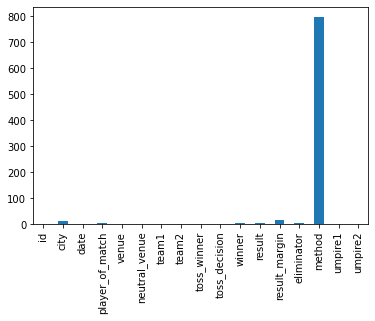

In [7]:
matches.isnull().sum().plot(kind='bar')

In [8]:
matches = matches.fillna(value={'method':0})

In [9]:
matches[matches.result.isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,DD,PWI,DD,bat,NaN,NaN,NaN,NaN,0,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,RCB,RR,RR,field,NaN,NaN,NaN,NaN,0,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,RCB,DD,RCB,field,NaN,NaN,NaN,NaN,0,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,RCB,RR,RR,field,NaN,NaN,NaN,NaN,0,UV Gandhe,NJ Llong


In [10]:
matches = matches[matches['result'].notnull()]

In [11]:
matches.loc[matches.result=='tie', 'result_margin']=0

In [13]:
matches.venue[matches.city.isnull()]

399                Sharjah Cricket Stadium
402    Dubai International Cricket Stadium
403    Dubai International Cricket Stadium
404                Sharjah Cricket Stadium
406                Sharjah Cricket Stadium
407    Dubai International Cricket Stadium
408                Sharjah Cricket Stadium
409    Dubai International Cricket Stadium
410    Dubai International Cricket Stadium
413                Sharjah Cricket Stadium
414                Sharjah Cricket Stadium
415    Dubai International Cricket Stadium
417    Dubai International Cricket Stadium
Name: venue, dtype: object

In [14]:
matches.city[matches.venue =='Dubai International Cricket Stadium'].unique()

array([nan, 'Dubai'], dtype=object)

In [15]:
matches.city[matches.venue == 'Sharjah Cricket Stadium'].unique()

array([nan, 'Sharjah'], dtype=object)

In [16]:
def venue_func(x):
    if x == 'Dubai International Cricket Stadium':
        return 'Dubai'
    if x == 'Sharjah Cricket Stadium':
        return 'Sharjah'
    else :
        return x
    
matches.city = matches.venue.apply(venue_func)

In [17]:
matches.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
method             0
umpire1            0
umpire2            0
dtype: int64

<AxesSubplot:>

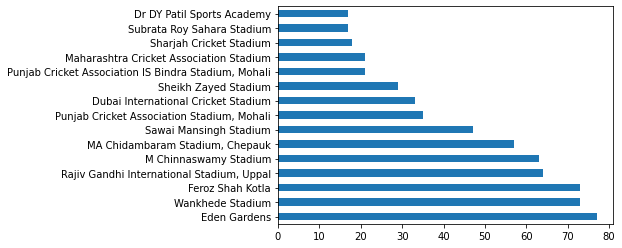

In [18]:
matches.venue.value_counts()[:15].plot(kind = 'barh')

In [19]:
matches.loc[matches.method == 'D/L',['venue']].value_counts()

venue                                              
Eden Gardens                                           4
Feroz Shah Kotla                                       3
M Chinnaswamy Stadium                                  3
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium    2
Rajiv Gandhi International Stadium, Uppal              2
Kingsmead                                              1
Nehru Stadium                                          1
Newlands                                               1
Sawai Mansingh Stadium                                 1
SuperSport Park                                        1
dtype: int64